In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Input, DepthwiseConv2D, Dropout, Add, GlobalAveragePooling2D, Input, SeparableConv2D

from tensorflow.keras.models import Sequential, Model  
from tensorflow.keras.callbacks import EarlyStopping

print(tf.__version__)
print(tf.test.gpu_device_name())


2023-02-20 21:18:01.631480: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-20 21:18:01.716324: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-20 21:18:02.372195: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64::/home/david/anaconda3/envs/tf/lib/
2023-02-20 21:18:02.

2.11.0
/device:GPU:0


2023-02-20 21:18:03.355116: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-20 21:18:03.375236: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-20 21:18:03.378253: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-20 21:18:03.378342: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at

Training Images range from 0.00000 to 1.00000
Test     Images range from 0.00000 to 1.00000
(32, 32, 3)


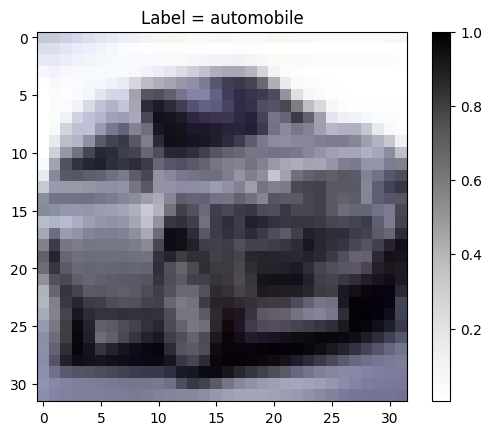

In [2]:
########################################
## Add code here to Load the CIFAR10 data set
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Now separate out a validation set.
val_frac = 0.1
num_val_samples = int(len(train_images)*val_frac)
# choose num_val_samples indices up to the size of train_images, !replace => no repeats
val_idxs = np.random.choice(np.arange(len(train_images)), size=num_val_samples, replace=False)
trn_idxs = np.setdiff1d(np.arange(len(train_images)), val_idxs)
val_images = train_images[val_idxs, :,:,:]
train_images = train_images[trn_idxs, :,:,:]

val_labels = train_labels[val_idxs]
train_labels = train_labels[trn_idxs]

train_labels = train_labels.squeeze()
test_labels = test_labels.squeeze()
val_labels = val_labels.squeeze()

input_shape  = train_images.shape[1:]
train_images = train_images / 255.0
test_images  = test_images  / 255.0
val_images   = val_images   / 255.0
print("Training Images range from {:2.5f} to {:2.5f}".format(np.min(train_images), np.max(train_images)))
print("Test     Images range from {:2.5f} to {:2.5f}".format(np.min(test_images), np.max(test_images)))

idx = 2401
plt.figure()
plt.imshow(train_images[idx], cmap='Greys')
plt.colorbar()
plt.grid(False)
plt.title("Label = {:}".format(class_names[train_labels[idx]]))
print(input_shape)

In [3]:
def build_model2():
    input_shape = (32, 32, 3)

    model = tf.keras.Sequential([
        Input(shape=input_shape, name='input'),
        Conv2D(32, kernel_size=(3,3), strides=(2,2), activation="relu", padding='same', name='conv1'),
        BatchNormalization(name='batch1'),
        
        SeparableConv2D(64, kernel_size=(3,3), strides=(2,2), activation="relu", padding='same', name='sep_conv2'),
        BatchNormalization(name='batch2'),
        
        SeparableConv2D(128, kernel_size=(3,3), strides=(2,2), activation="relu", padding='same', name='sep_conv3'),
        BatchNormalization(name='batch3'),
        
        # Add a batchnorm layer here
        #BatchNormalization(name='batch4'),
        
        SeparableConv2D(128, kernel_size=(3,3), activation="relu", padding='same', name='sep_conv5'),
        BatchNormalization(name='batch5'),

        SeparableConv2D(128, kernel_size=(3,3), activation="relu", padding='same', name='sep_conv6'),
        BatchNormalization(name='batch6'),

        SeparableConv2D(128, kernel_size=(3,3), activation="relu", padding='same', name='sep_conv7'),
        BatchNormalization(name='batch7'),

        SeparableConv2D(128, kernel_size=(3,3), activation="relu", padding='same', name='sep_conv8'),
        BatchNormalization(name='batch8'),

        #finishing layers
        MaxPooling2D(pool_size=(4, 4), strides=(4, 4), name='pool'),
        Flatten(name='flatten'),
        Dense(128, activation='relu', name='dense1'),
        Dense(10, name='dense2')
    ], name='model_2')
    
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    
    return model


In [4]:
model2 = build_model2()

# print the model summary
model2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 16, 16, 32)        896       
                                                                 
 batch1 (BatchNormalization)  (None, 16, 16, 32)       128       
                                                                 
 sep_conv2 (SeparableConv2D)  (None, 8, 8, 64)         2400      
                                                                 
 batch2 (BatchNormalization)  (None, 8, 8, 64)         256       
                                                                 
 sep_conv3 (SeparableConv2D)  (None, 4, 4, 128)        8896      
                                                                 
 batch3 (BatchNormalization)  (None, 4, 4, 128)        512       
                                                                 
 sep_conv5 (SeparableConv2D)  (None, 4, 4, 128)        1766

2023-02-20 21:18:10.469226: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-20 21:18:10.469384: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-20 21:18:10.469514: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-20 21:18:10.469817: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-20 21:18:10.469958: I tensorflow/compiler/xla/stream_executo

In [ ]:
def test_model2_params():
  assert model2.count_params() in [104138, 103594]


In [ ]:
test_model2_params()

In [ ]:
#train_hist = model2.fit(train_images, train_labels, 
#                  validation_data=(val_images, val_labels), # or use `validation_split=0.1`
#                  epochs=50)

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(train_hist.history['loss'])
plt.plot(train_hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

# Plot training and validation accuracy
plt.plot(train_hist.history['accuracy'])
plt.plot(train_hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()
